In [0]:
# sess = tf.Session()
# with sess.as_default():
#     tf.initialize_all_variables().run()
#     print(t[0].eval().shape)
#     num_arr = t.eval()
#     print(num_arr)
#     if len(num_arr.shape) == 4:
#         num_arr = np.squeeze(num_arr, 0)
#     num_arr[:, :, 0] += 103.939
#     num_arr[:, :, 1] += 116.779
#     num_arr[:, :, 2] += 123.68
#     num_arr = num_arr[:, :, ::-1]
#     num_arr = np.clip(num_arr, 0, 255).astype('uint8')
#     plt.imshow(num_arr)
#     plt.show()

In [0]:

# # optimizer = optim.Adam([targetImage],lr=.003)
# for i in range(iterations):
#     print("under for 1")
#     # content loss
#     content_loss = content_loss(features(content_img,"content")[0][0], features(init_img,"content")[0][0])
#     print("content passed")
#     print(content_loss)
#     # style loss
#     for j in range(len(style_layers)):
#         loss = tf.reduce_mean(gram_matrix(features(style_img,"style")[j][0]) - gram_matrix(features(init_img,"style")[j][0]))
#         print(j)
#         style_loss +=loss*float(0.25)
#     print("style passed")
        
#     #total_loss:-
#     total_loss = content_loss*c_weight + style_loss*s_weight
#     print("total loss passed")
    
#     # calulating gradient/slope:-
#     grad = cal_slope(total_loss,init_img)
#     print("cal_gradient passed")
#     # optimize
#     print(init_img.shape)
#     print(type(grad))
#     print(len(grad))
#     print(grad)
#     opt.apply_gradients([(grad, init_img)])
#     print("optimization passed")
#     clip_img = tf.clip_by_value(init_img,min_value,max_value)
#     init_img.assign(clip_img)
#     print("image clipped")
    
# print(init_img.shape)
    
    

In [0]:
import keras
import tensorflow.contrib.eager as tfe
from PIL import Image
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras import models
from tensorflow.python.keras import models 

In [0]:
tf.enable_eager_execution()

In [0]:
os.listdir()

['.config', 'turtle.jpeg', 'style_img.jpg', 'sample_data']

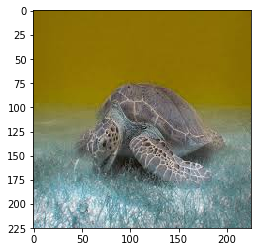

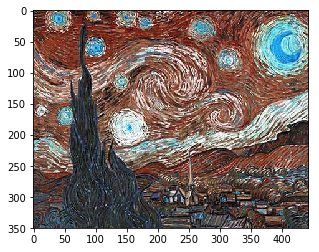

In [0]:
style_img = os.listdir()[2]
content_img = os.listdir()[1]
plt.imshow(cv2.imread(content_img))
plt.show()
plt.imshow(cv2.imread(style_img))
plt.show()

In [0]:
content_img=cv2.resize(cv2.imread(content_img),(int(200),int(200)))
style_img=cv2.resize(cv2.imread(style_img),(int(200),int(200)))
# init_img = np.random.rand(content_img.shape)
style_img.shape, content_img.shape

((200, 200, 3), (200, 200, 3))

In [0]:
# layers for extracting feature maps:-

# only one layer for content_feature_map:-(1)
content_layers = ["block5_conv2"]

# more than one layer for style_feature maps:-(5)
style_layers =[ 'block1_conv1',
               'block2_conv1',
               'block3_conv1', 
               'block4_conv1', 
               'block5_conv1'
            ]

In [0]:
# VGG19 model for conv layers( these layers are extracting feature maps):-
# from keras.applications import VGG19
# model = VGG19(weights ="imagenet",
#               include_top =False
#              )
# model.summary()


In [0]:
# def get_model():
#     """ Creates our model with access to intermediate layers. 

#     This function will load the VGG19 model and access the intermediate layers. 
#     These layers will then be used to create a new model that will take input image
#     and return the outputs from these intermediate layers from the VGG model. 

#     Returns:
#     returns a keras model that takes image inputs and outputs the style and 
#       content intermediate layers. 
#     """
#     # Load our model. We load pretrained VGG, trained on imagenet data
#     vgg = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
#     vgg.trainable = False
# #     print("vgg")
#     # Get output layers corresponding to style and content layers 
#     style_outputs = [vgg.get_layer(name).output for name in style_layers]
#     content_outputs = [vgg.get_layer(name).output for name in content_layers]
#     model_outputs = style_outputs + content_outputs
# #     print("model")
#     # Build model 
#     return models.Model(vgg.input, model_outputs)

In [0]:
def get_model():
    model = tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet')
    model.trainable = False
    style = [model.get_layer(name).output for name in style_layers]
    content = [model.get_layer(name).output for name in content_layers]
    model_outputs = content+style
    return models.Model(model.input,model_outputs)

In [0]:
# m1 = get_model()
# m1(load_img(content_img))[0]

In [0]:
def load_img(img):
    img = np.asarray(img,dtype='float32')
    content_array = np.expand_dims(img,axis=0)
    content_array[:, :, :, 0] -= 103.939
    content_array[:, :, :, 1] -= 116.779
    content_array[:, :, :, 2] -= 123.68
    content_array=content_array[:, :, :, ::-1]
    # type(img)
    # print(img.shape)
    img=tf.convert_to_tensor(content_array)
    return img

In [0]:
def features(img,konsa):
#     print("under features")
    sudo_model = get_model()
#     print("sudo_,model")
    sudo_t = sudo_model(img)
#     print("after sudo")
    sudo_t = {"content":[sudo_t[0]],"style":sudo_t[1:]}
    return sudo_t[konsa]

In [0]:
# for calculating the slope:-
def cal_slope(total_loss, init_img):
    with tf.GradientTape() as tape: 
        pass
    return tf.gradients(total_loss,init_img)

In [0]:
def content_loss(base_img,target_img): #images are in matrix form(pixels)
    return tf.reduce_mean(tf.square(base_img - target_img))

In [0]:
def gram_matrix(input_tensor):
    # We make the image channels first 
    channels = int(input_tensor.shape[-1])
    a = tf.reshape(input_tensor, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a=True)
    return gram / tf.cast(n, tf.float32)

In [0]:
content_img = load_img(content_img)
style_img = load_img(style_img)
init_img = content_img

In [0]:
iterations = 1
norm_means = np.array([103.939, 116.779, 123.68])
min_value = -norm_means
max_value = 255 - norm_means 
style_loss =0
opt = tf.train.AdamOptimizer(learning_rate=5, beta1=0.99, epsilon=1e-1)
init_img = tfe.Variable(content_img,dtype=tf.float32)
# init_img = np.random.rand(1,200,200,3)
# plt.imshow(init_img[0])
# plt.show()
# init_img = tfe.Variable(init_img,dtype=tf.float32)
c_weight = 1e3
s_weight = 1e-2

In [0]:

def compute_losses():
    # content loss
    content_l = content_loss(features(content_img,"content")[0][0], features(init_img,"content")[0][0])
#     print("content passed")
    print(content_l)
    # style loss
    style_loss =0
    for j in range(len(style_layers)):
        loss = tf.reduce_mean(gram_matrix(features(style_img,"style")[j][0]) - gram_matrix(features(init_img,"style")[j][0]))
        print(j)
        style_loss +=loss*float(j+0.5)
#     print("style passed")
        
    #total_loss:-
    total_loss = content_l*c_weight + style_loss*s_weight
#     print("total loss passed : ", total_loss)
    
    return content_loss, style_loss, total_loss

In [0]:
# for calculating the slope:-
def cal_slope(init_img):
    with tf.GradientTape() as tape: 
        c_l, s_l, total_loss = compute_losses()
    return tape.gradient(total_loss,init_img)

In [0]:
# optimizer = optim.Adam([targetImage],lr=.003)
sess = tf.Session()
best_loss = float('inf')
for i in range(100):
#     print("under for 1")
    
    # calulating gradient/slope:-
    grad = cal_slope(init_img)

    # optimize
    opt.apply_gradients([(grad, init_img)])
    
# print(init_img.shape)

ResourceExhaustedError: ignored

In [0]:
init_img.shape

TensorShape([Dimension(1), Dimension(200), Dimension(200), Dimension(3)])

In [0]:
image = init_img.numpy()

W0827 15:58:05.882156 140117741377408 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


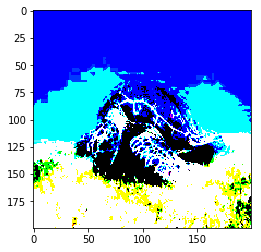

In [0]:
image.shape
plt.imshow(image[0])

In [0]:
sess = tf.Session()
with sess.as_default():
    tf.global_variables_initializer().run()
#     tf.initialize_all_variables().run()
    print(init_img.eval().shape)
    x = init_img.eval()[0]
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]
    x = np.clip(x,0,255).astype('uint8')
    
    plt.imshow(x)
    plt.show()